In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
%matplotlib inline

In [2]:
df=pd.read_csv("USA_Housing.csv")

In [3]:
df.head(5)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

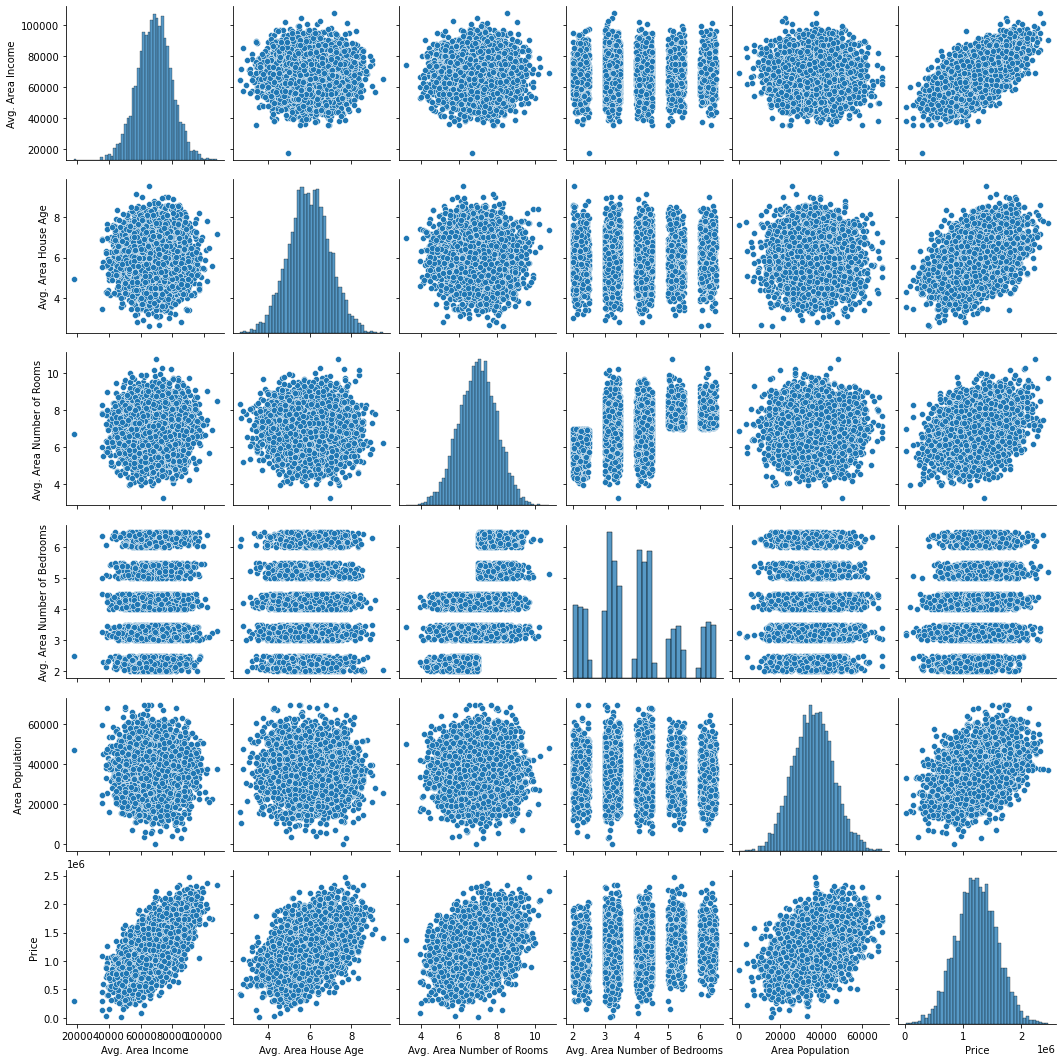

In [7]:
sns.pairplot(df)

In [8]:
# df.hvplot.hist(by='Price',subplots=False,width=1500)

In [9]:
# df.hvplot.hist('Price',width=500)

In [10]:
# df.hvplot.scatter(x='Avg. Area House Age',y='Price')

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

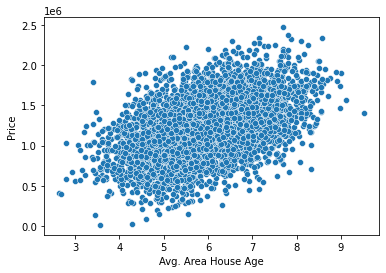

In [11]:
sns.scatterplot(data=df,x='Avg. Area House Age',y='Price')

<AxesSubplot:>

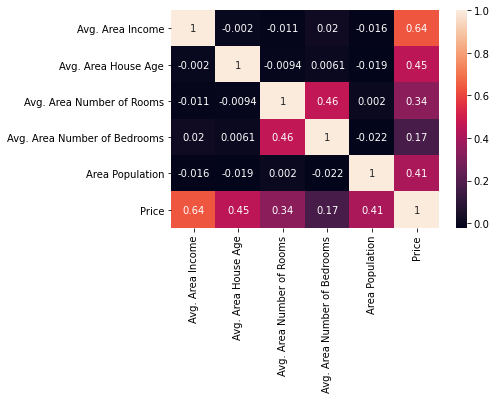

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [14]:
x=df.drop(['Price','Address'],axis=1)
y=df['Price']

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def cross_val(model):
    pred=cross_val_score(model,x,y,cv=10)
    return pred.mean()
def print_evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    print('MAE',mae)
    print("MSE",mse)
    print("RMSE",rmse)
    print("R2 Square", r2_square)

    
def evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    
    return mae,mse,rmse,r2_square

In [18]:
# !pip install Pipeline

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('std_scalar',StandardScaler())])
X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)
model=lin_reg.fit(X_train,y_train)
model

LinearRegression(normalize=True)

In [21]:
print(model.intercept_)

1228219.1492415662


In [22]:
coeff_df=pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income              232679.724643
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555478
Avg. Area Number of Bedrooms    2892.815119
Area Population               151252.342377

In [23]:
pred=model.predict(X_test)
pred

array([1308536.13592601, 1237122.72746459, 1243835.62817083, ...,
       1457119.79297222, 1483428.953093  , 1047510.59737207])

In [24]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [25]:
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

In [26]:
test_pred=model.predict(X_test)
train_pred=model.predict(X_train)
print("Test set evaluation : \n")
print_evaluate(y_test,test_pred)

print("Train set evaluation : \n")
print_evaluate(y_train,train_pred)

Test set evaluation : 

MAE 81135.56609336878
MSE 10068422551.40088
RMSE 100341.52954485436
R2 Square 0.9146818498754016
Train set evaluation : 

MAE 81480.49973174892
MSE 10287043161.197224
RMSE 101425.06180031257
R2 Square 0.9192986579075526


In [29]:
result_df=pd.DataFrame(data=[['Linear Regression',*evaluate(y_test,test_pred),cross_val(LinearRegression())]],
                      columns=['Model','MEA','MSE','RMSE','R2 Square','Cross Validation']
                      )
result_df

Model           MEA           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   

   Cross Validation  
0          0.917379